<a href="https://colab.research.google.com/github/nitwmanish/fastai/blob/master/fastai_lesson_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import*
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
import fastai
fastai.__version__

'1.0.59'

In [4]:
import torch
torch.__version__

'1.3.1'

In [0]:
bs = 64

In [0]:
path = untar_data(URLs.PETS)

In [7]:
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [8]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [10]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_154.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_106.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pug_8.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Bombay_100.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_142.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

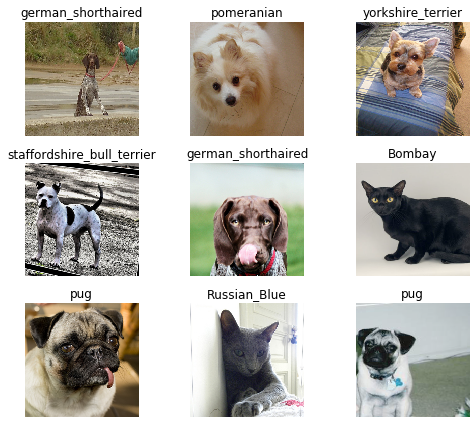

In [13]:
data.show_batch(rows=3, figsize=(7,6))

In [14]:
print(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [15]:
len(data.classes),data.c

(37, 37)

In [16]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [17]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.393146,0.328425,0.100812,01:20
1,0.606309,0.281757,0.085250,01:19
2,0.369144,0.248407,0.080514,01:19
3,0.268255,0.221391,0.065629,01:20


In [18]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

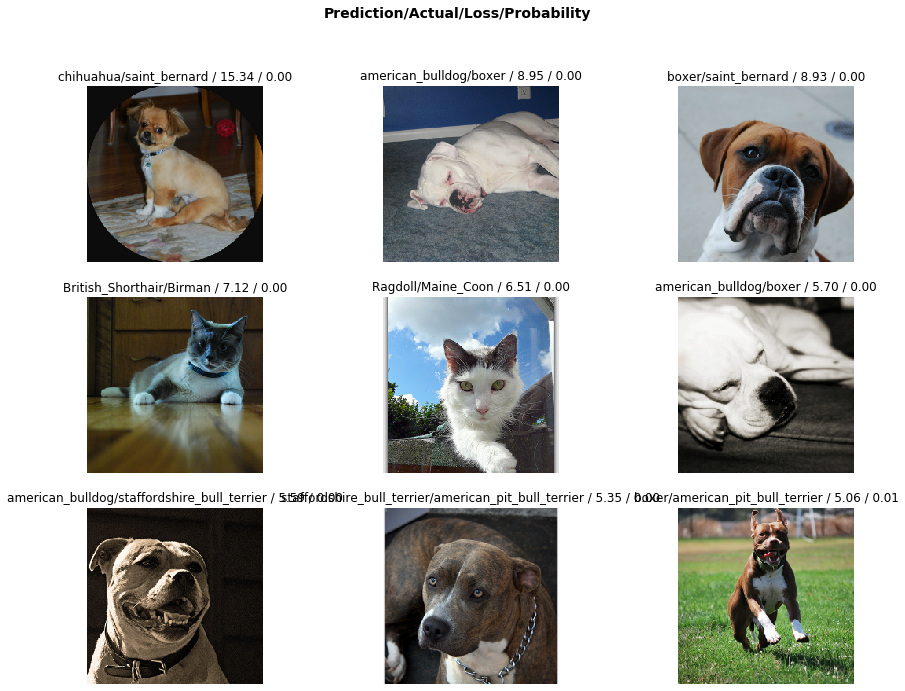

In [19]:
interp.plot_top_losses(9, figsize=(15,11))

In [20]:
doc(interp.plot_top_losses)

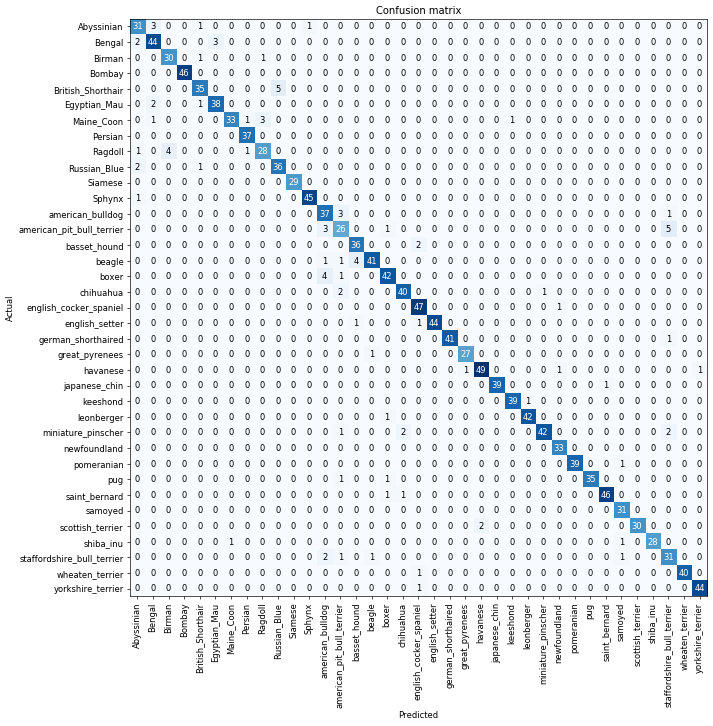

In [21]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [22]:
interp.most_confused(min_val=2)

[('British_Shorthair', 'Russian_Blue', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('Ragdoll', 'Birman', 4),
 ('beagle', 'basset_hound', 4),
 ('boxer', 'american_bulldog', 4),
 ('Abyssinian', 'Bengal', 3),
 ('Bengal', 'Egyptian_Mau', 3),
 ('Maine_Coon', 'Ragdoll', 3),
 ('american_bulldog', 'american_pit_bull_terrier', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('Bengal', 'Abyssinian', 2),
 ('Egyptian_Mau', 'Bengal', 2),
 ('Russian_Blue', 'Abyssinian', 2),
 ('basset_hound', 'english_cocker_spaniel', 2),
 ('chihuahua', 'american_pit_bull_terrier', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('miniature_pinscher', 'staffordshire_bull_terrier', 2),
 ('scottish_terrier', 'havanese', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

In [0]:
learn.unfreeze()

In [24]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.701767,0.361015,0.113667,01:22


In [25]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


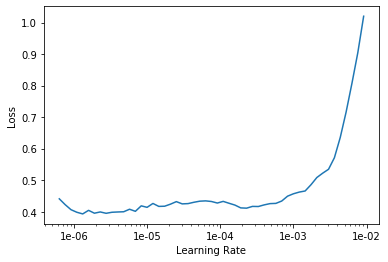

In [26]:
learn.recorder.plot()

In [27]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.392236,0.291238,0.094046,01:21
1,0.326852,0.280049,0.090663,01:21


In [28]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

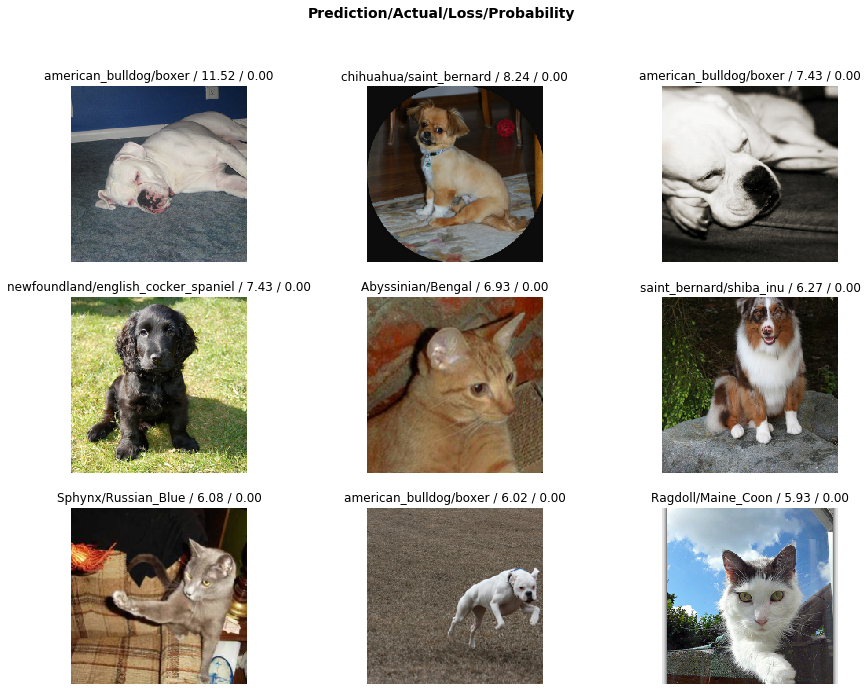

In [29]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


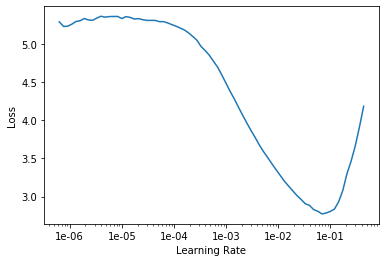

In [32]:
learn.lr_find()
learn.recorder.plot()

In [33]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.981929,0.267807,0.086604,01:56
1,0.494348,0.292984,0.094046,01:54
2,0.333187,0.294034,0.083897,01:54
3,0.269569,0.223746,0.066982,01:54
4,0.193522,0.218910,0.059540,01:53
5,0.142635,0.199492,0.055480,01:54
6,0.105970,0.186333,0.049391,01:54
7,0.088011,0.187983,0.052774,01:53


In [34]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=2)

[('Egyptian_Mau', 'Bengal', 5),
 ('Ragdoll', 'Birman', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('Russian_Blue', 'British_Shorthair', 4),
 ('american_bulldog', 'american_pit_bull_terrier', 4),
 ('chihuahua', 'miniature_pinscher', 4),
 ('miniature_pinscher', 'american_pit_bull_terrier', 4),
 ('american_bulldog', 'staffordshire_bull_terrier', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('Birman', 'Ragdoll', 2),
 ('Maine_Coon', 'Bengal', 2),
 ('Ragdoll', 'Persian', 2),
 ('basset_hound', 'beagle', 2),
 ('beagle', 'basset_hound', 2),
 ('miniature_pinscher', 'chihuahua', 2)]

In [35]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.082013,0.194220,0.052774,01:58
1,0.073937,0.197408,0.056157,01:59
2,0.059529,0.193221,0.054804,01:58


In [36]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 7),
 ('Ragdoll', 'Birman', 5),
 ('american_bulldog', 'staffordshire_bull_terrier', 4),
 ('chihuahua', 'miniature_pinscher', 4),
 ('Egyptian_Mau', 'Bengal', 3),
 ('american_bulldog', 'american_pit_bull_terrier', 3),
 ('beagle', 'basset_hound', 3),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Maine_Coon', 'Bengal', 2),
 ('Ragdoll', 'Persian', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('basset_hound', 'beagle', 2),
 ('boxer', 'staffordshire_bull_terrier', 2),
 ('miniature_pinscher', 'american_pit_bull_terrier', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 2)]